# Projekt - Etap I - Analiza danych
#### IUM 23L

In [1]:
import pandas as pd

## Analiza danych w wersji v1

In [2]:
artists_data = pd.read_json('../data/IUM22Z_Zad_04_02_v1/artists.jsonl', lines=True)
sessions_data = pd.read_json('../data/IUM22Z_Zad_04_02_v1/sessions.jsonl', lines=True)
tracks_data = pd.read_json('../data/IUM22Z_Zad_04_02_v1/tracks.jsonl', lines=True)
users_data = pd.read_json('../data/IUM22Z_Zad_04_02_v1/users.jsonl', lines=True)

In [3]:
artists_nulls = artists_data["id"].eq(-1).sum()
artists_len = len(artists_data["id"])
print(f'Null value percentage in artists_data: %.2f' % (artists_nulls * 100 / artists_len) , '% (', artists_nulls, '/', artists_len, ')')

Null value percentage in artists_data: 5.46 % ( 91 / 1667 )


In [4]:

tracks_nulls = tracks_data["id"].isnull().sum()
tracks_len = len(tracks_data["id"])
print(f'Null value percentage in tracks_data: %.2f' % (tracks_nulls * 100 / tracks_len) , '% (', tracks_nulls, '/', tracks_len, ')')

Null value percentage in tracks_data: 5.09 % ( 1140 / 22412 )


In [5]:
user_id_nulls = sessions_data["user_id"].isnull().sum()
track_id_nulls = sessions_data[(sessions_data['track_id'].isnull()) & (sessions_data['event_type'] != 'advertisment')].shape[0]
sessions_nulls = user_id_nulls + track_id_nulls
print(f'Null value percentage in sessions_data: %.2f' % (sessions_nulls * 100 / len(sessions_data)) , '% (', sessions_nulls, '/', len(sessions_data), ')')

Null value percentage in sessions_data: 9.93 % ( 2615 / 26347 )


Dane dostarczone w pliku `IUM22Z_Zad_04_02_v1.zip` zawierały wiele niekompletnych rekordów, które negatywnie wpłynęłyby na jakość dostarczonego rozwiązania. W związku z tym zwróciliśmy się do klienta o możliwość uzyskania lepszej jakości danych.

## Analiza danych w wersji v2

In [3]:
artists_data = pd.read_json('../data/IUM_Zad_04_02_v2/artists.jsonl', lines=True)
sessions_data = pd.read_json('../data/IUM_Zad_04_02_v2/sessions.jsonl', lines=True)
tracks_data = pd.read_json('../data/IUM_Zad_04_02_v2/tracks.jsonl', lines=True)
users_data = pd.read_json('../data/IUM_Zad_04_02_v2/users.jsonl', lines=True)

### Techniczny opis danych

In [12]:
artists_data.head()

,id,name,genres,new_feature
0,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,"[country rap, lgbtq+ hip hop, pop rap, queer c...",7
1,0xRXCcSX89eobfrshSVdyu,MEDUZA,"[dance pop, edm, pop dance, pop house, tropica...",11
2,3OKg7YbOIatODzkRIbLJR4,TheFatRat,[speedrun],7
3,4f7KfxeHq9BiylGmyXepGt,Tanishk Bagchi,"[desi pop, filmi, modern bollywood]",7
4,56mfhUDKa1vec6rSLZV5Eg,Jawsh 685,[nz pop],7


In [13]:
artists_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1667 non-null   object
 1   name         1667 non-null   object
 2   genres       1667 non-null   object
 3   new_feature  1667 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 52.2+ KB


In [14]:
tracks_data.head()

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0RNxWy0PC3AyH4ThH3aGK6,Mack the Knife,55,201467,0,19eLuQmk9aCobbVDHc6eek,1929,0.673,0.3770,0,-14.141,0.0697,0.586,0.000000,0.332,0.713,88.973
1,2W889aLIKxULEefrleFBFI,Someone to Watch Over Me,54,198000,0,1Mxqyy3pSjf8kZZL4QVxS0,1943,0.204,0.1510,2,-17.842,0.0418,0.947,0.000009,0.321,0.134,91.783
2,4Pnzw1nLOpDNV6MKI5ueIR,Nancy (With the Laughing Face) - 78rpm Version,55,199000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.295,0.0826,1,-19.569,0.0367,0.984,0.000358,0.156,0.169,128.600
3,7GLmfKOe5BfOXk7334DoKt,Saturday Night (Is The Loneliest Night In The ...,54,163000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.561,0.3350,9,-11.093,0.0499,0.840,0.000002,0.788,0.590,126.974
4,6kD1SNGPkfX9LwaGd1FG92,Put Your Dreams Away (For Another Day),53,186173,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.197,0.0546,1,-22.411,0.0346,0.950,0.276000,0.152,0.100,90.150


In [15]:
tracks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22412 entries, 0 to 22411
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22412 non-null  object 
 1   name              22412 non-null  object 
 2   popularity        22412 non-null  int64  
 3   duration_ms       22412 non-null  int64  
 4   explicit          22412 non-null  int64  
 5   id_artist         22412 non-null  object 
 6   release_date      22412 non-null  object 
 7   danceability      22412 non-null  float64
 8   energy            22412 non-null  float64
 9   key               22412 non-null  int64  
 10  loudness          22412 non-null  float64
 11  speechiness       22412 non-null  float64
 12  acousticness      22412 non-null  float64
 13  instrumentalness  22412 non-null  float64
 14  liveness          22412 non-null  float64
 15  valence           22412 non-null  float64
 16  tempo             22412 non-null  float6

In [16]:
users_data.head()

,user_id,name,city,street,favourite_genres,premium_user
0,101,Dominik Paździora,Wrocław,aleja Jabłoniowa 55/02,"[dance pop, latin, hard rock]",False
1,102,Justyna Mszyca,Poznań,ul. Krótka 710,"[reggaeton, latin arena pop, modern rock]",False
2,103,Kornelia Witka,Gdynia,al. Kościuszki 587,"[rap, art rock, rock]",False
3,104,Jędrzej Kotala,Gdynia,pl. Kossaka 97/86,"[mexican pop, contemporary country, psychedeli...",False
4,105,Karol Kleban,Kraków,ul. Tulipanowa 861,"[rock, adult standards, permanent wave]",False


In [17]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           1000 non-null   int64 
 1   name              1000 non-null   object
 2   city              1000 non-null   object
 3   street            1000 non-null   object
 4   favourite_genres  1000 non-null   object
 5   premium_user      1000 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 40.2+ KB


In [18]:
sessions_data.head()

,session_id,timestamp,user_id,track_id,event_type
0,124,2023-01-19 14:26:10.000,101,4flBNxpPLGVAdufOzRBIen,play
1,124,2023-01-19 14:26:23.069,101,4flBNxpPLGVAdufOzRBIen,like
2,125,2022-08-26 07:28:50.181,101,3uMYq07Kj5m564OQwdSCrD,play
3,126,2022-06-12 12:42:47.160,101,2RChe0r2cMoyOvuKobZy44,play
4,126,2022-06-12 12:42:49.685,101,None,advertisment


In [19]:
sessions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580246 entries, 0 to 580245
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   session_id  580246 non-null  int64         
 1   timestamp   580246 non-null  datetime64[ns]
 2   user_id     580246 non-null  int64         
 3   track_id    503028 non-null  object        
 4   event_type  580246 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 22.1+ MB


> ⚠️ Ilość danych o sesjach w wersji v2 wzrosła z 26347 do 580246

### Eksploracja danych

In [20]:
import matplotlib.pyplot as plt

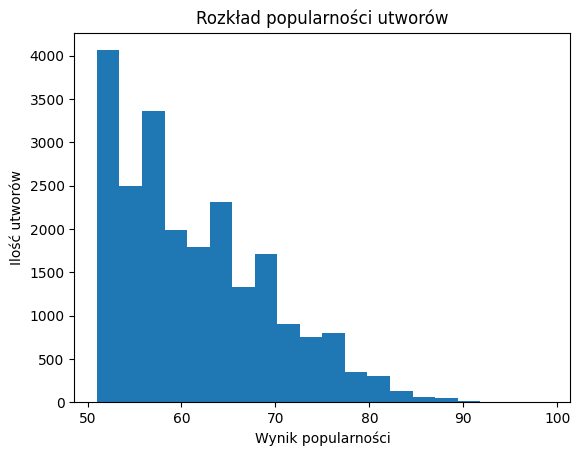

Mean popularity score: 61.37560235588078
Median popularity score: 60.0
Standard deviation of popularity score: 8.04824643276168


In [21]:
plt.hist(tracks_data['popularity'], bins=20)
plt.title('Rozkład popularności utworów')
plt.xlabel('Wynik popularności')
plt.ylabel('Ilość utworów')
plt.show()

popularity_mean = tracks_data['popularity'].mean()
popularity_median = tracks_data['popularity'].median()
popularity_std = tracks_data['popularity'].std()

print('Mean popularity score:', popularity_mean)
print('Median popularity score:', popularity_median)
print('Standard deviation of popularity score:', popularity_std)

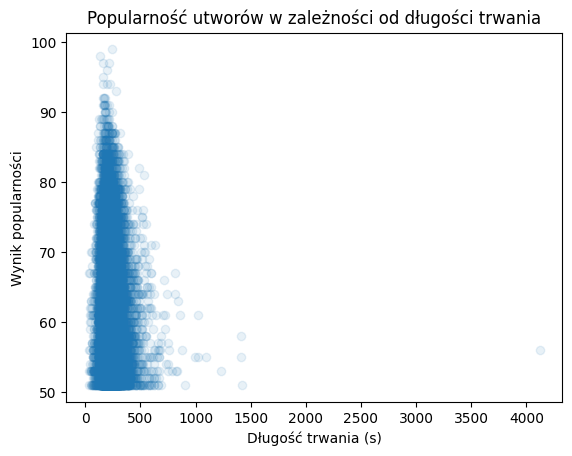

In [22]:
plt.scatter(tracks_data['duration_ms'] / 1000, tracks_data['popularity'], alpha=0.1)
plt.title('Popularność utworów w zależności od długości trwania')
plt.xlabel('Długość trwania (s)')
plt.ylabel('Wynik popularności')
plt.show()

Interesującym jest występowanie utworów zarówno bardzo krótkich (poniżej 60 sekund), jak i bardzo długich, w szczególności utworu trwającego ponad 4000 sekund.

In [23]:
tracks_data['release_date'] = pd.to_datetime(tracks_data['release_date'])
tracks_data['release_date'] = tracks_data['release_date'].dt.strftime('%Y-%m')

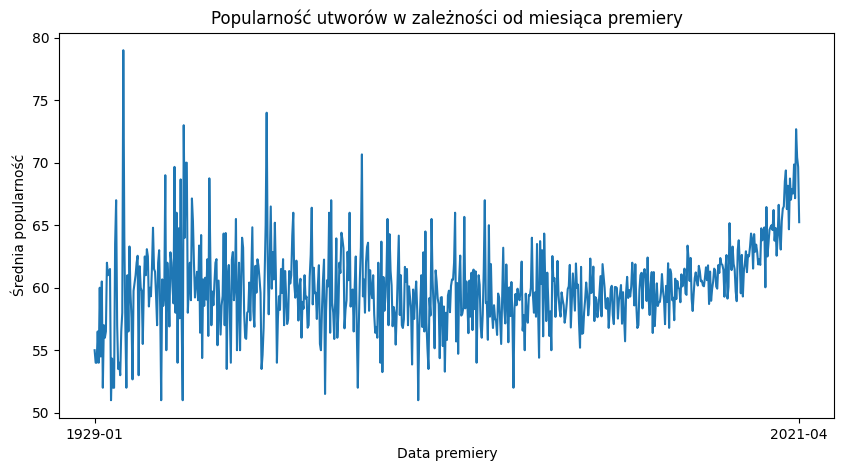

In [24]:
popularity_by_date = tracks_data.groupby('release_date')['popularity'].mean()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(popularity_by_date.index, popularity_by_date.values)
ax.set_xlabel('Data premiery')
ax.set_ylabel('Średnia popularność')
ax.set_title('Popularność utworów w zależności od miesiąca premiery')

ax.set_xticks([popularity_by_date.index[0], popularity_by_date.index[-1]])
plt.show()

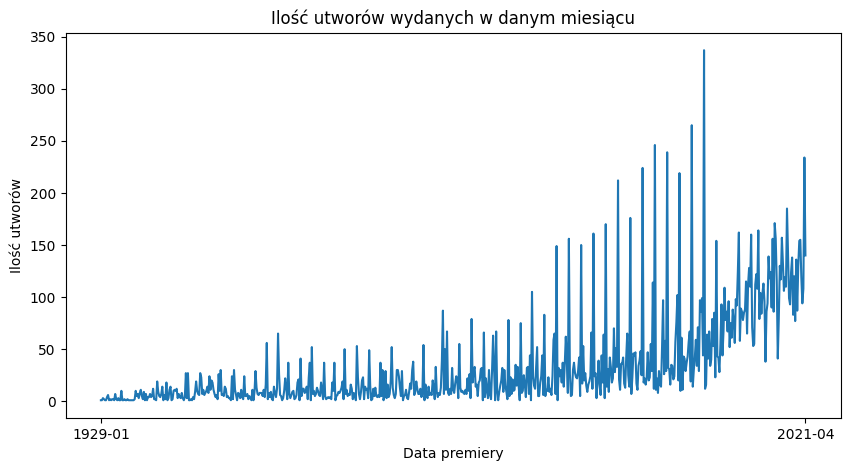

In [25]:
released_by_date = tracks_data.groupby('release_date')["id"].count()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(released_by_date.index, released_by_date.values)
ax.set_xlabel('Data premiery')
ax.set_ylabel('Ilość utworów')
ax.set_title('Ilość utworów wydanych w danym miesiącu')

ax.set_xticks([released_by_date.index[0], released_by_date.index[-1]])
plt.show()

W ogólności utwory które zostały wydane niedawno są bardziej popularne, chociaż najwyższą średnią popularność jest osiągana dla utworów starych - wynika to jednak z tego, iż w bazie utworów znajdują się jedynie nieliczne i najpopularniejsze utwory z tamtych czasów.

In [26]:
import seaborn as sns

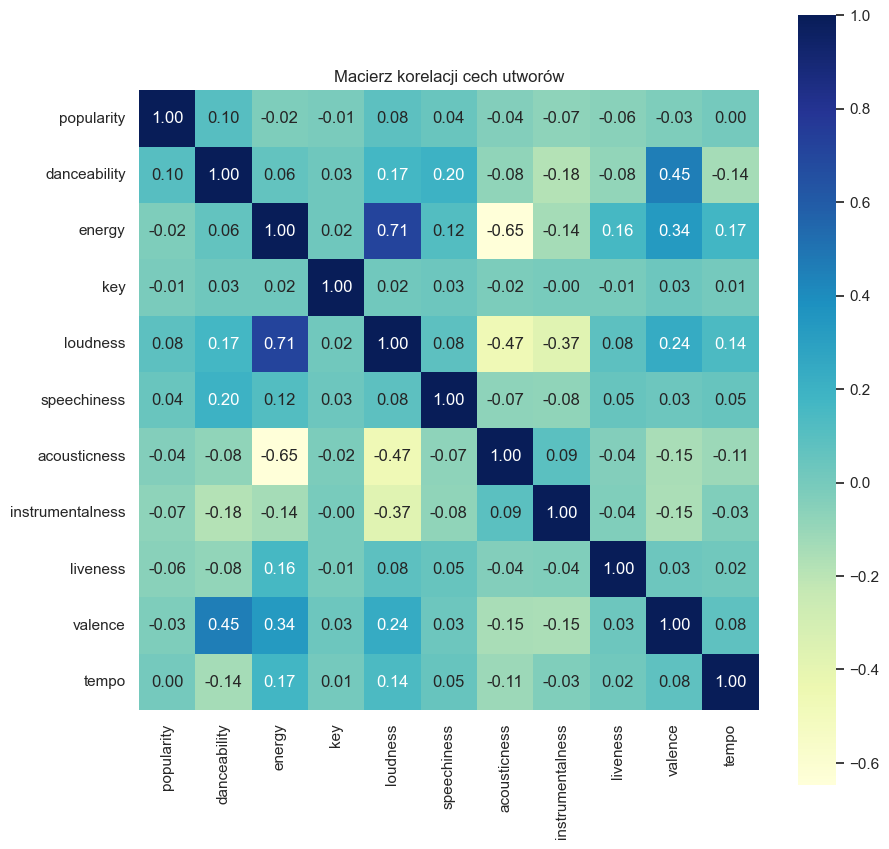

In [27]:
track_features = tracks_data.iloc[:, 3:]
corr_matrix = tracks_data.drop(['id', 'name', 'duration_ms', 'explicit', 'id_artist', 'release_date'], axis=1).corr()

sns.set(style="white")
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt='.2f', square=True, ax=ax)
ax.set_title('Macierz korelacji cech utworów')
plt.show()

Maksymalny współczynnik korelacji pomiędzy dwoma atrybutami utworu to 0.71 - choć jest to stosunkowo wysoka korealacja, to jednak nie uważamy aby w tym przypadku opłacało się wyrzucać któryś z atrybutów.

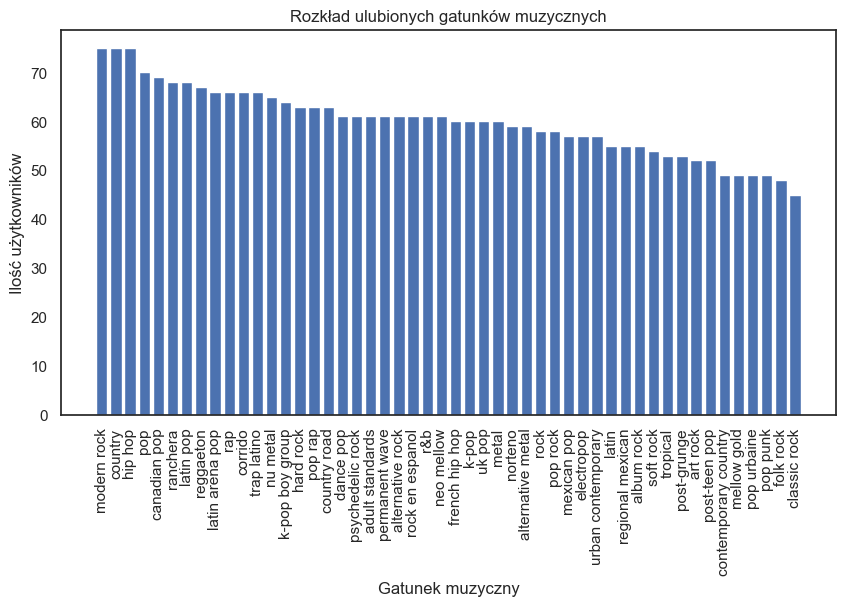

In [28]:
favorite_genres = []
for genres in users_data['favourite_genres']:
    favorite_genres.extend(genres)

genre_counts = {}
for genre in favorite_genres:
    if genre in genre_counts:
        genre_counts[genre] += 1
    else:
        genre_counts[genre] = 1

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar([genre[0] for genre in sorted_genres], [genre[1] for genre in sorted_genres])
ax.set_xlabel('Gatunek muzyczny')
ax.set_ylabel('Ilość użytkowników')
ax.set_title('Rozkład ulubionych gatunków muzycznych')
plt.xticks(rotation=90)
plt.show()

Chociaż żaden z gatunków nie jest dominujący, to można zauważyć wyraźne różnice w ich popularności - będzie to więc uźyteczny atrybut w przypadku przewidywania popularności utworów.

In [9]:
tracks_artists_data = tracks_data.merge(artists_data, left_on='id_artist', right_on='id', how='left')

In [30]:
genre_counts = {}
for genres in tracks_artists_data['genres']:
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

sorted_genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
sorted_labels = [genre[0] for genre in sorted_genre_counts]
sorted_counts = [genre[1] for genre in sorted_genre_counts]

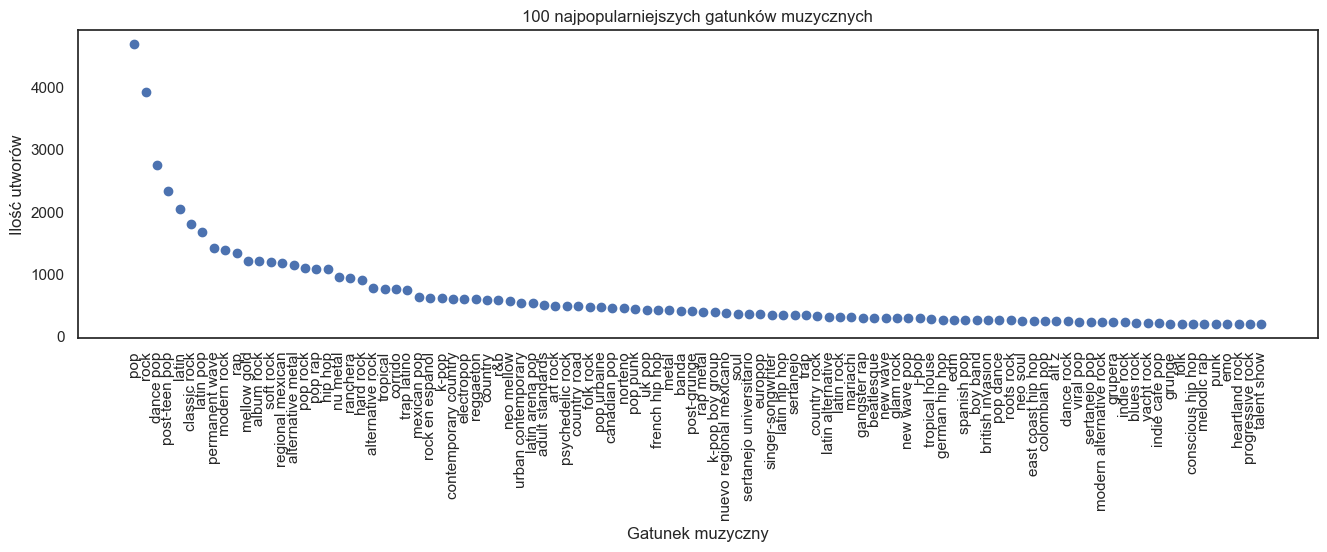

In [31]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(sorted_labels[:100], sorted_counts[:100], 'o')
ax.set_title('100 najpopularniejszych gatunków muzycznych')
plt.rc('xtick', labelsize=8)
ax.set_xlabel('Gatunek muzyczny')
ax.set_ylabel('Ilość utworów')
plt.xticks(rotation=90) 
plt.show()